<a href="https://colab.research.google.com/github/Subhajeet-Khawas/DeepLearningCampusX/blob/main/EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
X,y=make_circles(n_samples=100, noise=0.1, random_state=1)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [7]:
X[:,1]

array([-0.36870191, -0.73659196, -1.06687743, -0.40841948, -0.51730147,
        0.76955129, -0.84899624, -0.49081236,  0.58056527,  0.73011595,
       -0.73075986, -0.92504802,  0.62120588,  0.12510879, -0.01347859,
       -0.7880243 , -0.70895455, -0.55976747, -0.37153443,  1.01205842,
        0.22821311,  0.20310719, -0.35861224,  0.68169193,  0.58630948,
       -1.0080984 , -0.62509577, -0.33410313, -0.59576417, -0.9098264 ,
        0.82536558, -0.14503976,  0.20621942, -0.51026584, -0.66844291,
       -0.97937344, -0.31993308,  0.64009007,  0.23454524, -0.80013947,
       -0.74493827,  0.30557432, -0.13028889,  0.7088594 , -0.67082245,
       -0.82061786, -0.63891465, -0.74994685, -0.09886802, -0.0931694 ,
       -0.59471995,  0.52172511,  0.30319732,  0.56332827,  0.65833135,
       -0.08311653,  0.46063137, -0.95784326,  0.33757265,  0.05031276,
       -0.61756242,  0.75032484,  0.46339773, -0.84351537, -0.34005691,
       -0.81418053,  0.89270399,  0.57613098, -0.01098796, -0.83

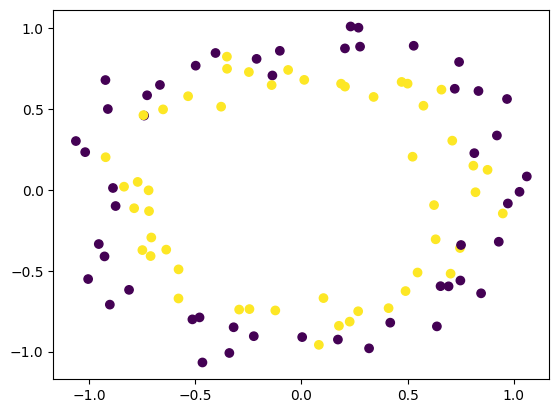

In [15]:
plt.scatter(X[:,0],X[:,1],c=y)

In [18]:
model=Sequential()

In [19]:
model.add(Dense(256,activation="relu",input_dim=2))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [22]:
history=model.fit(X_train,y_train,epochs=3500,verbose=1,validation_split=0.2)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 69ms/step - loss: 0.1665 - accuracy: 0.9531 - val_loss: 0.8104 - val_accuracy: 0.7500
Epoch 1002/3500
2/2 [==============================] - 0s 68ms/step - loss: 0.1669 - accuracy: 0.9531 - val_loss: 0.8161 - val_accuracy: 0.7500
Epoch 1003/3500
2/2 [==============================] - 0s 108ms/step - loss: 0.1663 - accuracy: 0.9531 - val_loss: 0.8156 - val_accuracy: 0.7500
Epoch 1004/3500
2/2 [==============================] - 0s 65ms/step - loss: 0.1661 - accuracy: 0.9531 - val_loss: 0.8113 - val_accuracy: 0.7500
Epoch 1005/3500
2/2 [==============================] - 0s 67ms/step - loss: 0.1662 - accuracy: 0.9531 - val_loss: 0.8080 - val_accuracy: 0.7500
Epoch 1006/3500
2/2 [==============================] - 0s 92ms/step - loss: 0.1656 - accuracy: 0.9531 - val_loss: 0.8102 - val_accuracy: 0.7500
Epoch 1007/3500
2/2 [==============================] - 0s 78ms/step - loss: 0.1657 - accuracy: 0.953

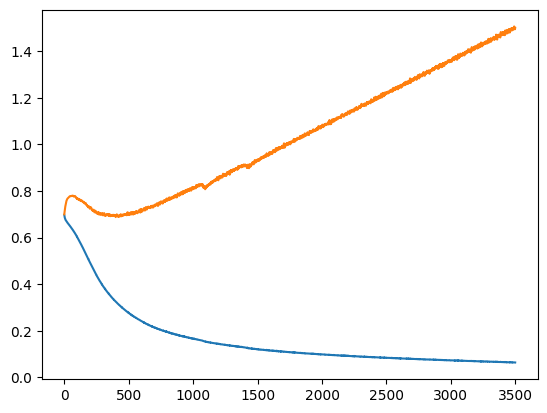

In [23]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")

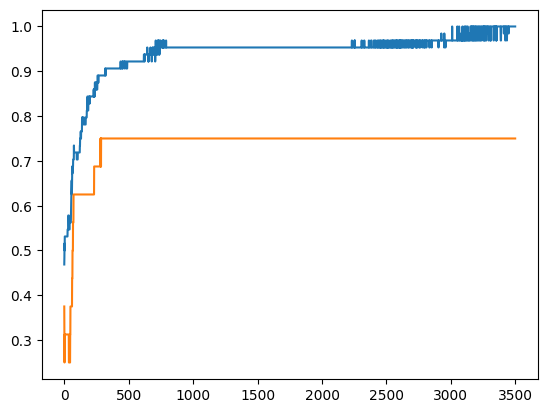

In [24]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="test")

In [30]:
y_prob=model.predict(X_test)
y_pred=np.where(y_prob>0.5,1,0)
accuracy_score(y_test,y_pred)

1/1 [==============================] - 0s 40ms/step


0.65

Early Stopping

In [42]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [43]:
history=model.fit(X_train,y_train,epochs=3500,verbose=1,validation_data=(X_test, y_test),callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 56ms/step - loss: 0.3507 - accuracy: 0.9500 - val_loss: 1.3041 - val_accuracy: 0.7000
Epoch 2/3500
3/3 [==============================] - 0s 21ms/step - loss: 0.3313 - accuracy: 0.9500 - val_loss: 1.2432 - val_accuracy: 0.6500
Epoch 3/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.3040 - accuracy: 0.9250 - val_loss: 1.2141 - val_accuracy: 0.6500
Epoch 4/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.2991 - accuracy: 0.9250 - val_loss: 1.2569 - val_accuracy: 0.6500
Epoch 5/3500
3/3 [==============================] - 0s 27ms/step - loss: 0.2781 - accuracy: 0.9250 - val_loss: 1.3339 - val_accuracy: 0.6500
Epoch 6/3500
3/3 [==============================] - 0s 22ms/step - loss: 0.2727 - accuracy: 0.9250 - val_loss: 1.4030 - val_accuracy: 0.6500
Epoch 7/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.2668 - accuracy: 0.9250 - val_loss: 1.4370 - val_accuracy: 0.6500
Epoch 8/3500


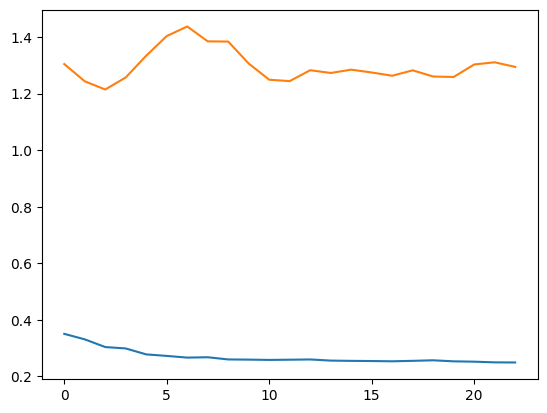

In [44]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")

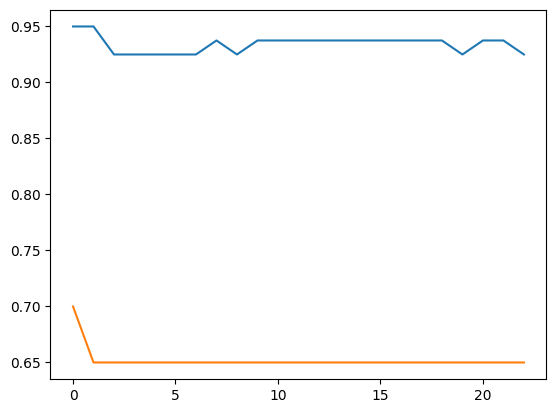

In [45]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="test")

In [46]:
y_prob=model.predict(X_test)
y_pred=np.where(y_prob>0.5,1,0)
accuracy_score(y_test,y_pred)

1/1 [==============================] - 0s 28ms/step


0.65